#                           Time Series Analysis On Portfolio Data

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("portfolio_data.csv")

In [11]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [13]:
df.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
datetime.now()

datetime.datetime(2024, 5, 18, 15, 29, 17, 986708)

In [15]:
df.set_index('Date', inplace=True)


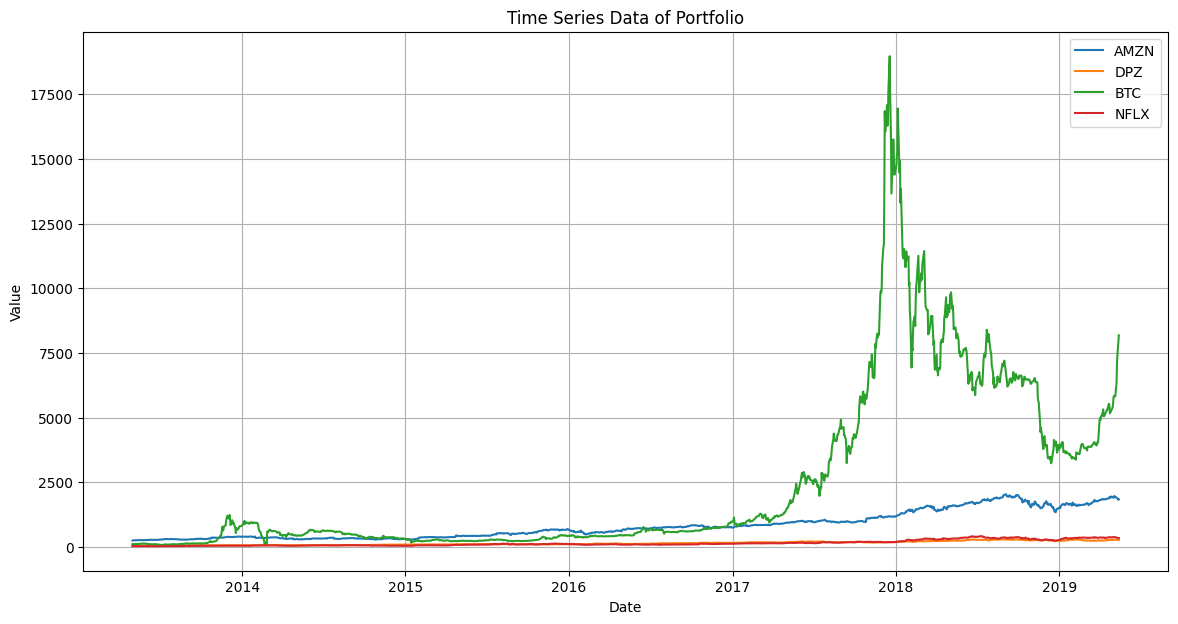

           This plot shows the values of AMZN, DPZ, BTC, and NFLX over time


In [19]:
plt.figure(figsize=(14, 7), facecolor='white')
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Time Series Data of Portfolio')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
print("           This plot shows the values of AMZN, DPZ, BTC, and NFLX over time")

In [20]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


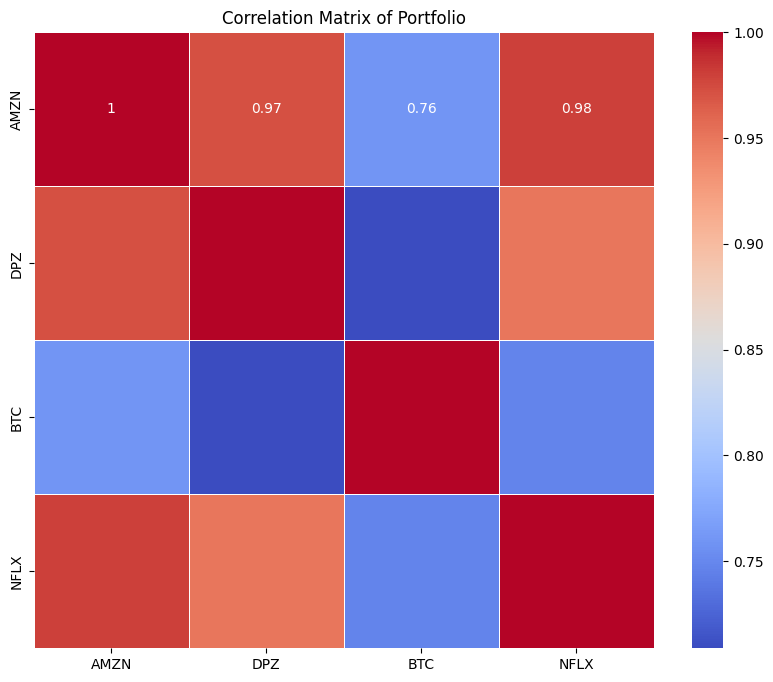

In [22]:
plt.figure(figsize=(10, 8), facecolor='white')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Portfolio')
plt.show()

Correlation Matrix Reveals That:

- AMZN and DPZ have a strong positive correlation.
- AMZN and NFLX, as well as DPZ and NFLX, have moderate positive correlations.
- BTC has low correlations with all other assets, indicating it behaves more independently within this portfolio.

<Axes: xlabel='Date'>

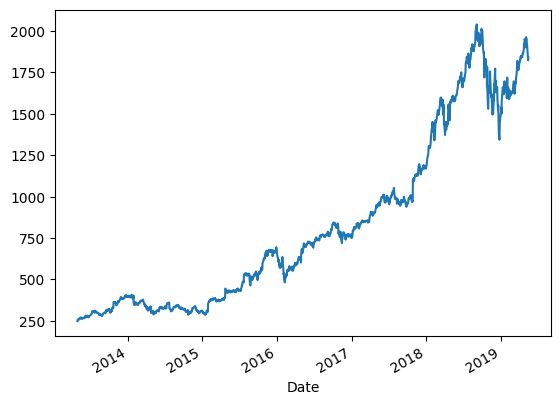

In [23]:
df['AMZN'].plot()

<Axes: xlabel='Date'>

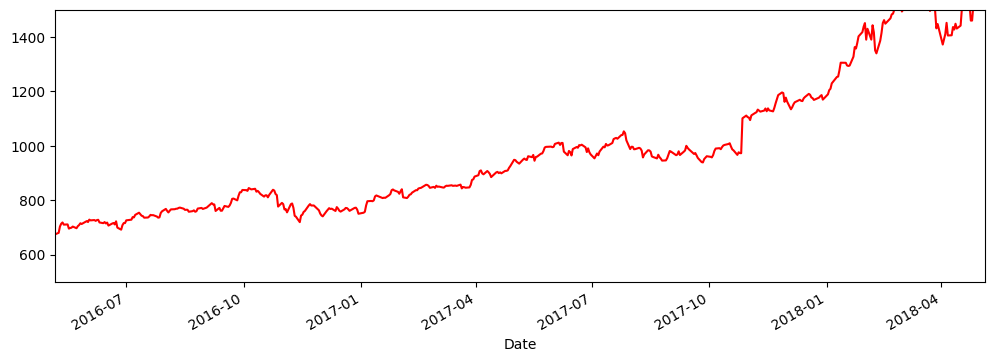

In [65]:
df['AMZN'].plot(xlim=['5/6/2016','5/5/2018'],ylim=[500,1500],figsize=(12,4),c='r')

<Axes: xlabel='Date'>

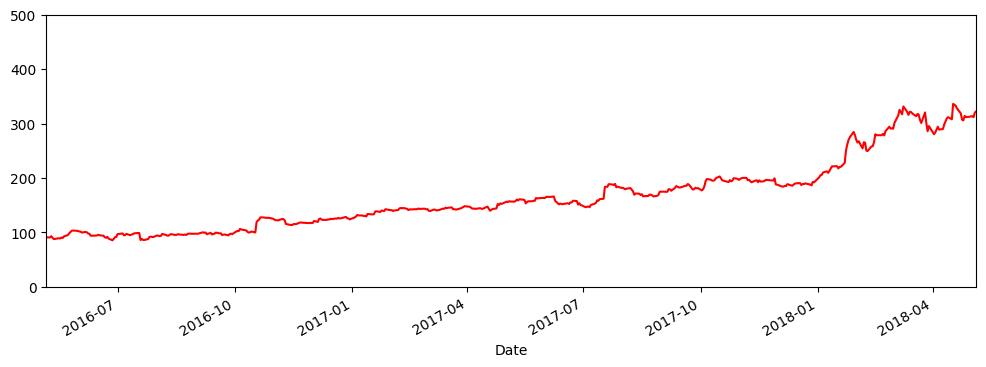

In [66]:
df['NFLX'].plot(xlim=['5/6/2016','5/5/2018'],ylim=[0,500],figsize=(12,4),c='r')

The Graph Show Quaterly Start Frequency


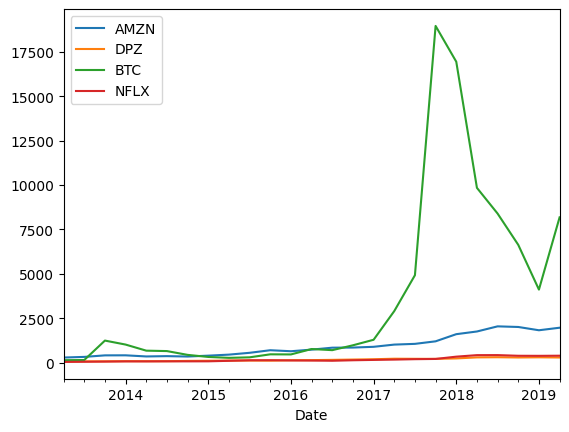

In [34]:
df.resample(rule='QS').max().plot()
print("The Graph Show Quaterly Start Frequency")

This Plot Show Business End Frequency


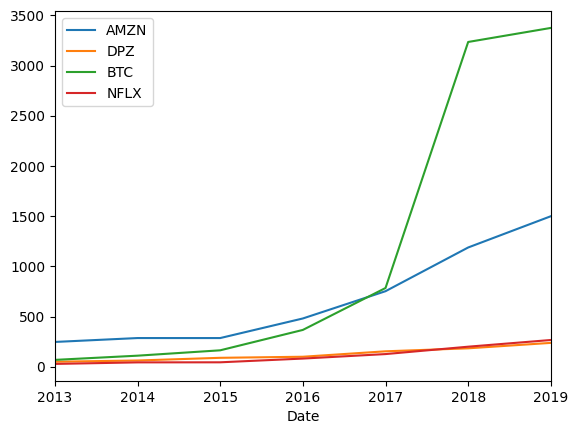

In [35]:
df.resample(rule='BA').min().plot()
print("This Plot Show Business End Frequency")

<Axes: xlabel='Date'>

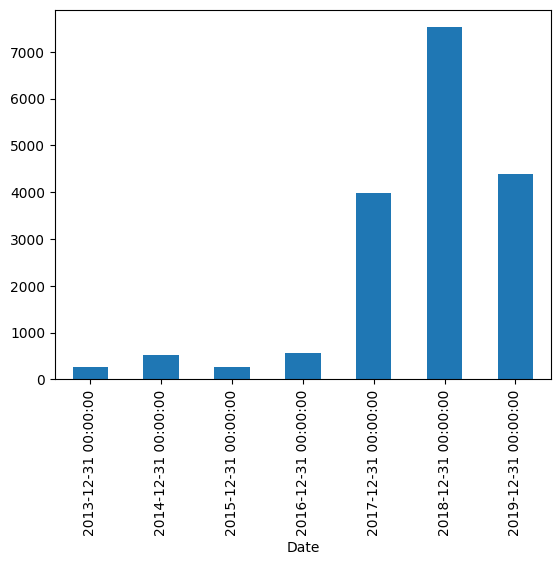

In [37]:
df['BTC'].resample(rule='A').mean().plot(kind='bar')

The Graph Is Representing Monthly Mean


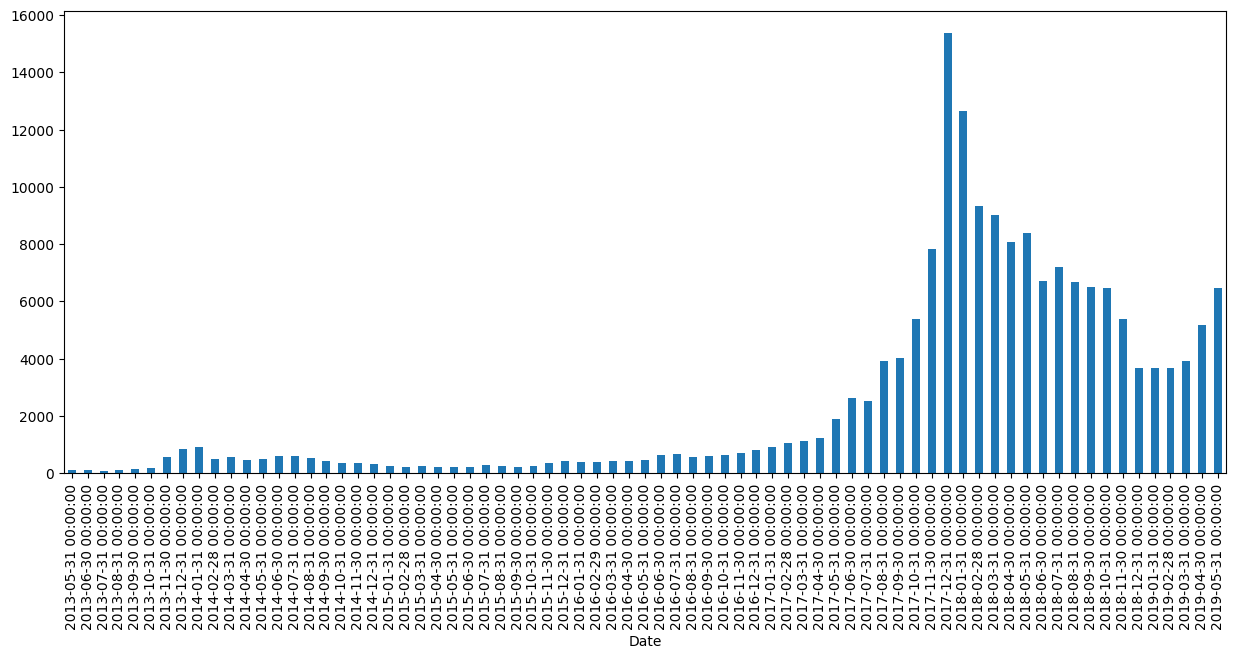

In [75]:
df['BTC'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))
print("The Graph Is Representing Monthly Mean")

In [57]:
annual_max=df.resample(rule='A').max()

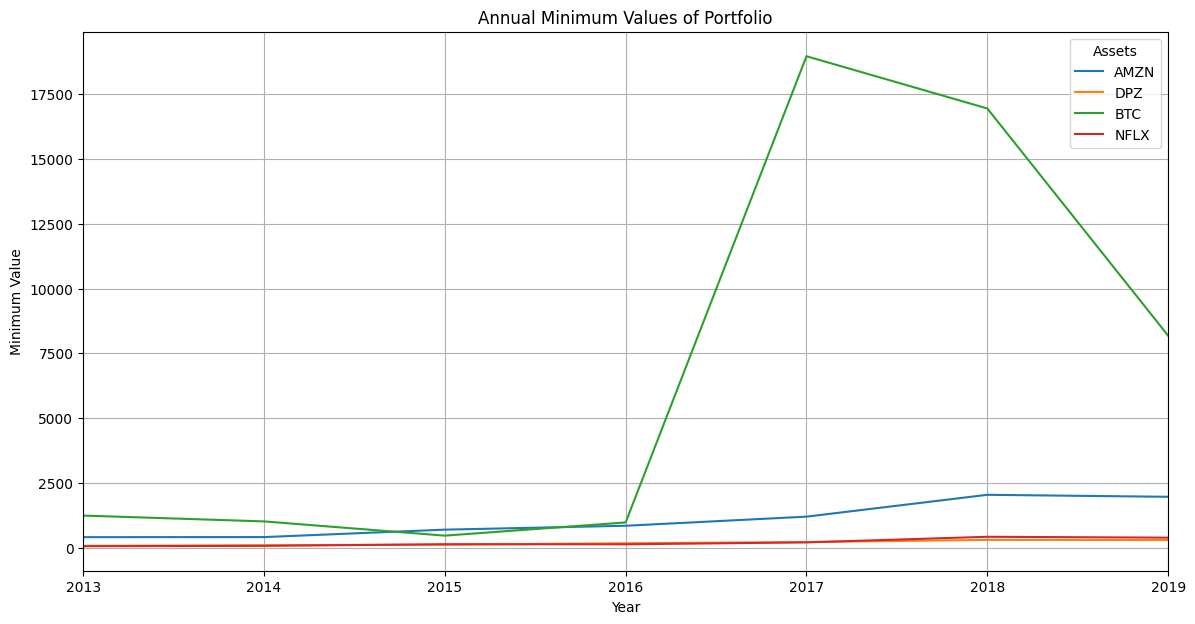

In [58]:
plt.figure(figsize=(14, 7), facecolor='white')
annual_max.plot(ax=plt.gca())
plt.title('Annual Minimum Values of Portfolio')
plt.xlabel('Year')
plt.ylabel('Minimum Value')
plt.legend(title='Assets')
plt.grid(True)
plt.show()

In [59]:
rolling_mean = df.rolling(window=30).mean()
rolling_std = df.rolling(window=30).std()

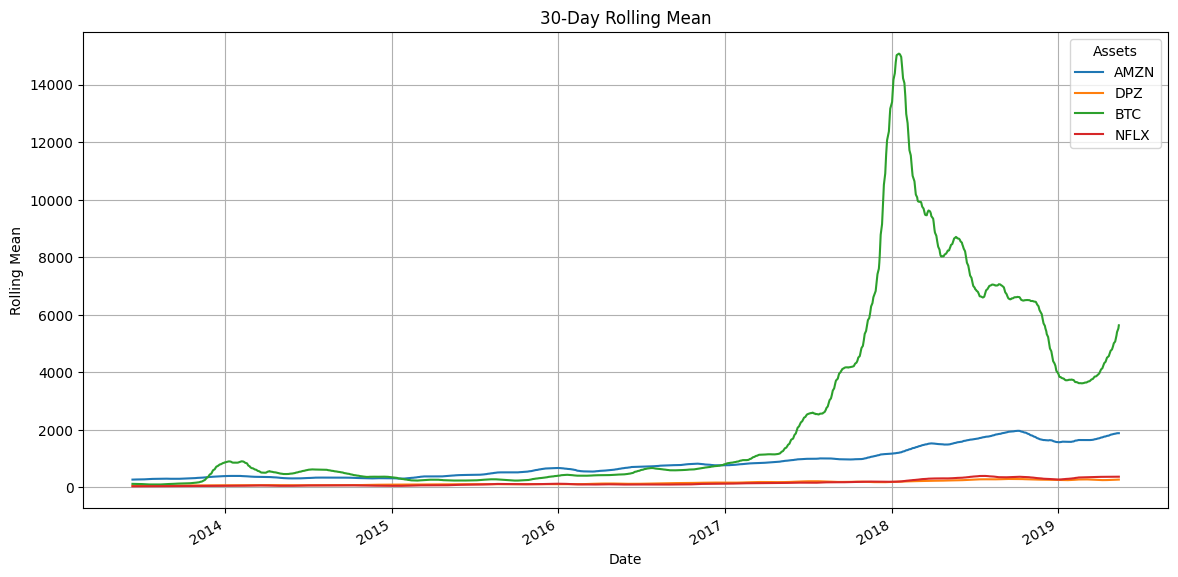

In [60]:
plt.figure(figsize=(14, 7), facecolor='white')
rolling_mean.plot(ax=plt.gca(), title='30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.legend(title='Assets')
plt.grid(True)
plt.show()

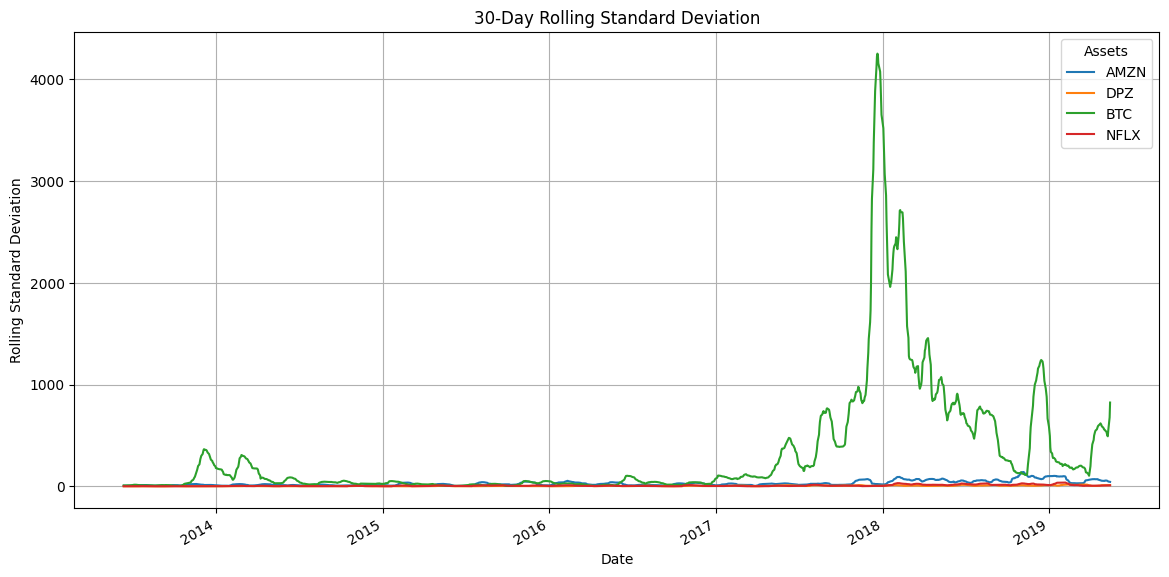

In [61]:
plt.figure(figsize=(14, 7), facecolor='white')
rolling_std.plot(ax=plt.gca(), title='30-Day Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend(title='Assets')
plt.grid(True)
plt.show()

Rolling Mean and Standard Deviation:

- The 30-day rolling mean and standard deviation provide insights into the short-term trends and volatility of each asset.
- Assets with higher rolling standard deviations indicate higher volatility over the 30-day window.

In [70]:
daily_returns = df.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()

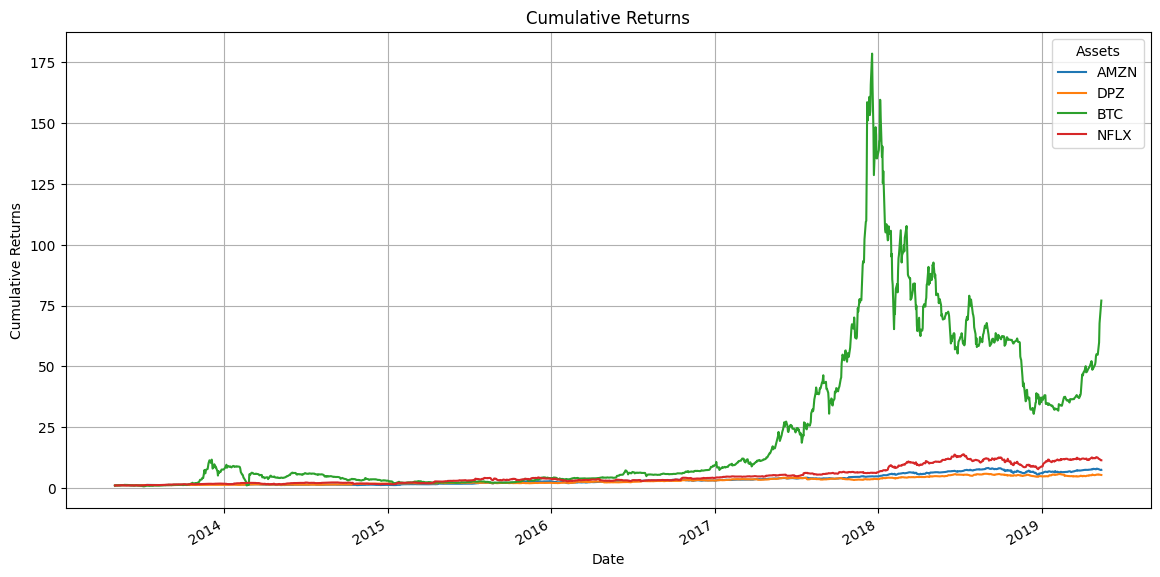

In [71]:
plt.figure(figsize=(14, 7), facecolor='white')
cumulative_returns.plot(ax=plt.gca(), title='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(title='Assets')
plt.grid(True)
plt.show()

In [76]:
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max


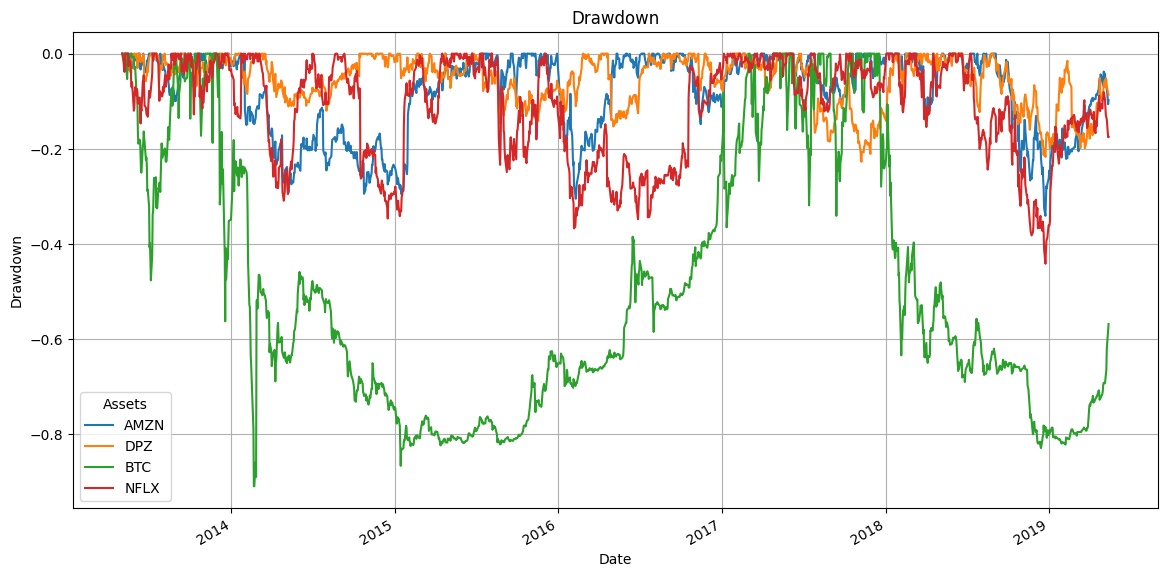

In [77]:
plt.figure(figsize=(14, 7), facecolor='white')
drawdown.plot(ax=plt.gca(), title='Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend(title='Assets')
plt.grid(True)
plt.show()

# Analysis Summary



30-Day Rolling Mean and Standard Deviation:

- The rolling mean provides insights into the average price of each asset over a 30-day window.
- The rolling standard deviation indicates the volatility of each asset over the same period.
 
Cumulative Returns:

- Cumulative returns show the total return of each asset over the entire period.
- This helps in understanding the overall performance of each asset in the portfolio.

Correlation Heatmap:

- The correlation heatmap visualizes the relationships between the assets.
- High positive correlations indicate that the assets tend to move together, while negative correlations indicate that they move inversely.

Drawdown:

- Drawdown measures the peak-to-trough decline for each asset.
- This helps in understanding the maximum potential loss during the period.



These analyses provide a comprehensive view of the portfolio's performance, risk, and relationships between the assets